## Ex. 

- Write a function called BiasPmf that takes a Pmf representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new Pmf representing the distribution of runners’ speeds as seen by the observer.

- To test your function, get the distribution of speeds from a normal road race (not a relay). I wrote a program that reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to MPH. Download it from http://thinkstats.com/relay.py. Run it and look at the PMF of speeds.

- Now compute the distribution of speeds you would observe if you ran a relay race at 7.5 MPH with this group of runners. You can download a solution from http://thinkstats.com/relay_soln.py

In [1]:
import relay
import relay_soln
import csv
import Pmf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 1. BiasPmf():
- Input ==> distribution of runners' speeds, speed of the running observer .. 
- Output ==> a new Pmf (the distribution of runners’ speeds as seen by the observer) ..

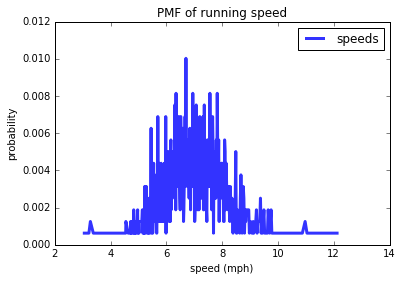

In [2]:
relay.main() ## it gave me an error, however, it is mandate to output the graph and compare it with mine

The output of calling the main is a distribution of the speeds .. 

Let's implemnting our own function and test the results .. 

In [3]:
res = relay.ReadResults() ## read the results from the competition URL and returns them in tuples .. 

In [4]:
## write data in csv file .. 
## this reading is related to Julia's implementation 
with open('results.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(res)

In [5]:
speeds = relay.GetSpeeds(res) ## these are the speeds in MPH

In [6]:
## let's compute the pmf for the above speeds .. considering the speeds as our target list .. 

pmf = Pmf.MakePmfFromList(speeds, 'speeds')
# pmf.d ## dictionary of pmf

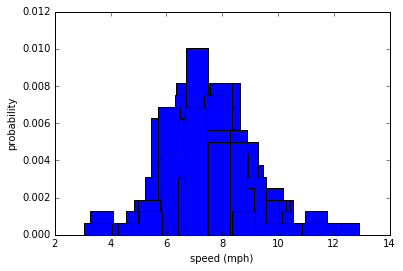

In [7]:
## now let's plot this dict .. using bar plot as these are discerete values ..

plt.bar(pmf.d.keys(), pmf.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

## Comment:

- The shape is a little bit weird becuase the number of data points are huge .. 

- The distribution of the output speeds is similar to that one from calling the main() .. 

- It is almost normal .. So far this is the distribution of the overall speeds .. 


==> Let's construct the biasPmf function .. 



In [8]:
runner_speed = np.random.choice(pmf.d.keys())
runner_speed

6.8833652007648176

In [9]:
new_pmf = relay_soln.BiasPmf(pmf, runner_speed)
new_pmf.d.keys()[1:10], new_pmf.d.values()[1:10]

([9.375,
  6.0,
  8.933002481389577,
  8.0,
  8.16326530612245,
  4.0862656072644725,
  5.194805194805195,
  5.741626794258373,
  7.003891050583658],
 [0.0069129434214562522,
  0.0024508622432328326,
  0.004264978928638234,
  0.0054216043562423351,
  0.0044387910580681285,
  0.0019401108902457828,
  0.0011712109443683075,
  0.0055434900673382928,
  0.00075238709018341302])

<Container object of 374 artists>

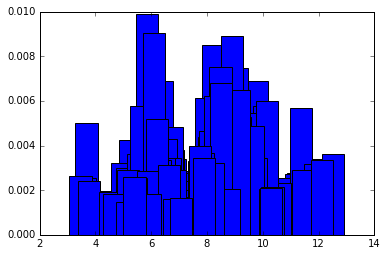

In [10]:
plt.bar(new_pmf.d.keys(), new_pmf.d.values())

## Comment:
The runner (observer) is chosen at random from the set of runners .. 
i.e. if his running speed is 9.2 .. 

The above conclusion is also hold in case of 9.2 running speed .. 

PMF values around 9.2 are less than the orginal values .. becuase the chance of overtaking a runner, or being overtaken, is proportional to the difference in their speeds.

Most of the speeds far from 9.2 have higher probabilities (i.e. after 10 or below 6) .. 

This influences the normality of the shape .. 

## 3. Distribution of speeds (wrt 7.5 MPH):

In [11]:
biase_7 = relay_soln.BiasPmf(pmf, 7.5)
# biase_7.d

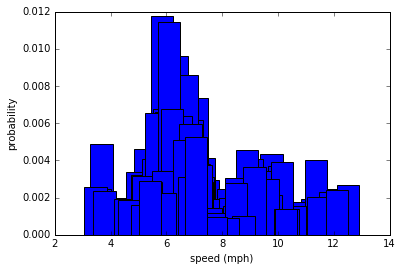

In [12]:
plt.bar(biase_7.d.keys(),biase_7.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

The above conclusion is also hold in case of 7.5 running speed .. 

PMF values around 7.5 are less than the orginal values .. 

Most of the speeds far from 7.5 have higher probabilities (i.e. after 10 or below 6) .. 

This influences the normality of the shape .. 

This means that the runner's observation is biased according to his speed ..

## Let's test the above conclusion: 
End to end implementation ..

In [13]:
diff = []
for i in pmf.d.keys():
    diff.append(abs(i - runner_speed))
diff[1:10]

[2.4916347992351824,
 0.88336520076481762,
 2.0496372806247596,
 1.1166347992351824,
 1.2799001053576315,
 2.7970995935003451,
 1.6885600059596229,
 1.1417384065064446,
 0.12052584981883996]

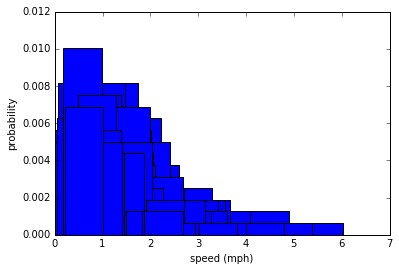

In [14]:
plt.bar(diff, pmf.d.values())
plt.xlabel('speed (mph)')
plt.ylabel('probability')

Range of values differs from the original plot ..!!!

In [16]:
def BiasPMF(pmf, runner_speed):
    diff = []
    mult_ = []

    for i in xrange(len(pmf.d.keys())):
        diff.append(abs(pmf.d.keys()[i] - runner_speed))  ## speeds 
        mult_.append(pmf.d.get(pmf.d.keys()[i], 0) * diff[i]) ## look for the key, If it's not found it returns 0, then add the finding as the key's value


    norm = [float(i)/sum(mult_) for i in mult_]  ## normalized probs
    
    return norm
    # mult_[1:10]
    # norm

In [18]:
norm = BiasPMF(pmf, runner_speed)

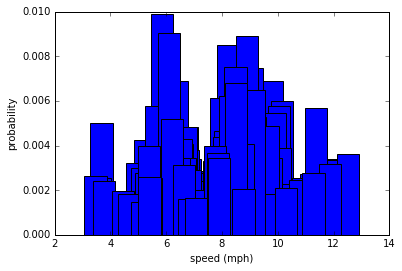

In [19]:
plt.bar(pmf.d.keys(), norm)
plt.xlabel('speed (mph)') ## speeds not difference of speeds 
plt.ylabel('probability')

Almost the same shape as the one generated using the built in function .. however, the probabilties are different a bit ! (i.e I have smaller probs after speed of 10 .. and higher before speed of 4) 